### Importamos Librerías Necesarias

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importamos la tabla con los datos a trabajar

In [ ]:
# Ruta al archivo Excel
file_path = './tabla general todos los casos.xlsx'

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
print(df.head())

### Preprocessing Data

In [54]:
# Renombrar las columnas eliminando la palabra "_corregido"
df.columns = [col.replace('_corregido', '') if '_corregido' in col else col for col in df.columns]


# Renombrar la columna 's_global' por 'satisfaccion'
df = df.rename(columns={'s_global': 'satisfaccion'})


# Guardar el DataFrame modificado a un nuevo archivo Excel
output_file_path = './DB/Data_Nombres_Corregidos.xlsx'
df.to_excel(output_file_path, index=False)

# Mostrar las primeras filas del DataFrame modificado
#print(df.head())


In [55]:
# Columna: "enfermedad_dicotomic"
# Modificar: Los "0" por "control" y los "1" por "NEO"

df['enfermedad_dicotomic'] = df['enfermedad_dicotomic'].replace({0: 'control', 1: 'NEO'})

# Mostrar el DataFrame después de realizar los cambios
#print(df)


In [57]:
# Columna: "enferdad_dicotomic"
# Filtrar: Dejando solos los "NEO"

df_Neo = df.loc[df['enfermedad_dicotomic'] == "NEO"]

# Mostrar el DataFrame filtrado
print(df_Neo)

     paciente  edad            enfermedad enfermedad_dicotomic tratamiento  \
65   PS060757    65                Cervix                  NEO          NO   
66   RA030878    44  Cervix tiene ovarios                  NEO          NO   
67   ZM300774    48  Cervix tiene ovarios                  NEO          NO   
68   HM220464    59                Cervix                  NEO          NO   
69   DC170974    48                Cervix                  NEO          NO   
70   HM130178    45  Cervix tiene ovarios                  NEO          NO   
71   PS110856    65                Cervix                  NEO          NO   
72   FA160955    68                Cervix                  NEO          NO   
73   DC160476    47  Cervix tiene ovarios                  NEO          NO   
74   CM050780    42  Cervix tiene ovarios                  NEO          NO   
75   MD250580    42  Cervix tiene ovarios                  NEO          NO   
76   AC030387    36  Cervix tiene ovarios                  NEO  

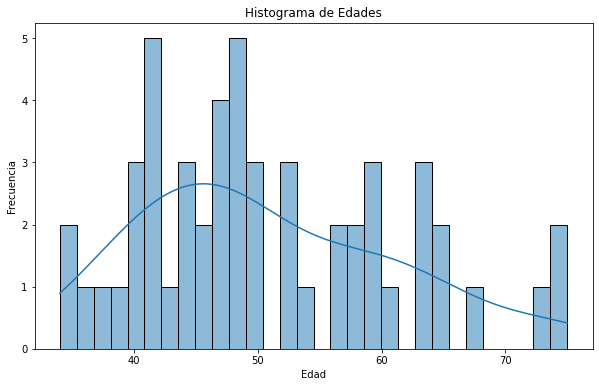

La media de las edades es: 50.81
La mediana de las edades es: 48.00


In [58]:
### HISTOGRAMA, MEDIA Y MEDIANA "EDAD"

# Crear el histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_Neo['edad'], bins=30, kde=True)

# Añadir títulos y etiquetas
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# Calcular la media de las edades
media_edad = df_Neo['edad'].mean()
print(f"La media de las edades es: {media_edad:.2f}")

# Calcular la mediana de las edades
mediana_edad = df_Neo['edad'].median()
print(f"La mediana de las edades es: {mediana_edad:.2f}")


In [ ]:
# Añadir una nueva columna para parametrizar las edades > 48 y <= 48
df_Neo['categoria_edad'] = df_Neo['edad'].apply(lambda x: '>48' if x > 48 else '<=48')

# Agregar columna "interdisciplinaria" en base "cant_profesionales"
df_Neo['interdisciplinaria'] = df_Neo['cant_profesionales'].apply(lambda x: 'NO' if x == 1 else 'SI')

# Reordenamos columnas para facilitar la visualización
column_order = ['edad', 'categoria_edad', 'cant_profesionales', 'interdisciplinaria'] + [col for col in df.columns if col not in ['edad', 'categoria_edad', 'cantidad_profesionales', 'interdisciplinaria']]
df_Neo = df_Neo[column_order]

#Mostramos Nueva Tabla
print(df_Neo.head())

In [61]:
# Filter table, keeping woman with each cancer

def filtrar_por_enfermedad(df, enfermedad):
    """
    Función para filtrar un DataFrame por el valor de la columna 'enfermedad'.

    Parameters:
    - df: DataFrame original que contiene la columna 'enfermedad'.
    - enfermedad: Valor de la enfermedad por el cual filtrar el DataFrame.

    Returns:
    - DataFrame filtrado con las filas correspondientes a la enfermedad especificada.
    """
    tabla_enfermedad = df[df['enfermedad'] == enfermedad]
    return tabla_enfermedad

# Filtrar la columna 'enfermedad' para obtener solo las filas con el valor "ovario"
tabla_ovario = filtrar_por_enfermedad(df_Neo,"ovario")
tabla_endometrio = filtrar_por_enfermedad(df_Neo,"endometrio")
tabla_cervix = filtrar_por_enfermedad(df_Neo,"Cervix")

tabla_NEO$enfermedad=="Cervix tiene ovarios",]
tabla_cervix_sinOva <- tabla_NEO[tabla_NEO$enfermedad=="Cervix",]
tabla_cervix_conOva <- tabla_NEO[tabla_NEO$enfermedad=="Cervix tiene ovarios",]

Filtrar en función de la columna menospausia las que digas SI o sean NAN. En función de esto crear tabla_general_meno

General una tabla control dónde deje solamente las que diga enfermadad control con nombre tabla_control

# Loop through each column and perform wilcox-test
si_group <- tabla_control %>% 
  filter(menopausia == "SI")
no_group <- tabla_control %>% 
  filter(menopausia == "NO")

Creo dos tablas nuevas
si_group --> en funcion de la columa menospausia de la tabla control.
no_group --> en funcion de la columna menospausia de la tabla control.

### ANÁLISIS DESCRIPTIVO Y TEST DE NORMALIDAD

summary(tabla_general$edad) --> Descripción estadística de la edad en la tabla general
summary(tabla_NEO$edad) --> Analisis estadístico descriptivo de la edad en la tabla NEO
t.test(tabla_general$edad, tabla_NEO$edad) --> Analisis estadístico comparativo de la edad entre los datos de la tabla general y la tabla_NEO
wilcox.test(tabla_general$edad, tabla_NEO$edad) --> Hace el mismo análisis que la línea anterior solo que el de arriba considera que los datos tienene distribución normal y este no.

# Comprobaci�n  distribucion normal y homogeneidad de varianza para cada columna numerica
normality_cols <- c("edad", "deseo_corregido", "exitacion_corregido", "lubricacion_corregido", 
                     "orgasmo_corregido", "s_global_corregido", "dolor_corregido", "total_corregido")

Seleccino columnas dónde voy a realizar el test de normalidad.

### Normality test para pacientes control ====
# Prueba de distribucion normal: Shapiro Wilk
for (col in normality_cols) {
  normal_test <- shapiro.test(tabla_control[,col])
  cat("Nomality test results for ", col, ":\n")
  print(normal_test)
}

Hago el test de normalidad para las columnas seleccionadas en la tabla_control


# Normality test para pacientes control menopausicas
# Prueba de distribucion normal: Shapiro Wilk
for (col in normality_cols) {
  normal_test <- shapiro.test(no_group[,col])
  cat("Nomality test results for ", col, ":\n")
  print(normal_test)
}

Hago el test de normalidad para las columnas seleccionadas en tabla no_group

# Normality test para pacientes control NO menopausicas
# Prueba de distribucion normal: Shapiro Wilk
for (col in normality_cols) {
  normal_test_meno <- shapiro.test(si_group[,col])
  cat("Nomality test results for ", col, ":\n")
  print(normal_test_meno)
}

Hago el test de normalidad para las columnas seleccionadas en tabla si_group

### Normality test para pacientes NEO ====
# Prueba de distribucion normal: Shapiro Wilk
for (col in normality_cols) {
  normal_test <- shapiro.test(tabla_NEO[,col])
  cat("Nomality test results for ", col, ":\n")
  print(normal_test)
}

Hago el test de normalidad para las columnas seleccionadas en tabla tabla_NEO

Mejorar este código para que haga el mismo test pero para las distintas tablas

Generar una tabla con los resultaddos de la normalización si o no